In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()
train_images,test_images=train_images/255,test_images/255 #normalization

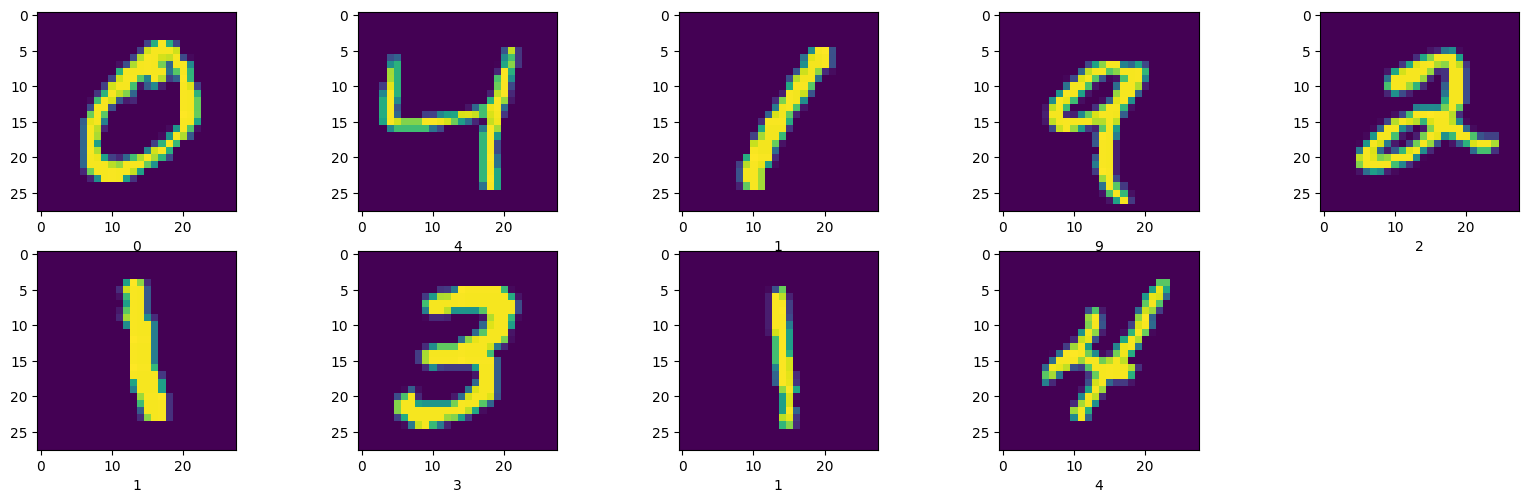

In [ ]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in range(1,10):
  plt.subplot(5,5,plotnumber)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])
  plotnumber+=1
plt.show()

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        8096      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
Total params: 17624 (68.84 KB)
Trainable params: 17624

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        8096      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 288)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_images,train_labels,validation_split=0.1,epochs=5)

Epoch 1/5
1688/1688 [==============================] - 13s 6ms/step - loss: 0.2345 - accuracy: 0.9244 - val_loss: 0.1163 - val_accuracy: 0.9632
Epoch 2/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0730 - accuracy: 0.9779 - val_loss: 0.0597 - val_accuracy: 0.9818
Epoch 3/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0561 - accuracy: 0.9831 - val_loss: 0.0515 - val_accuracy: 0.9850
Epoch 4/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0462 - accuracy: 0.9864 - val_loss: 0.0464 - val_accuracy: 0.9877
Epoch 5/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0405 - accuracy: 0.9883 - val_loss: 0.0513 - val_accuracy: 0.9848


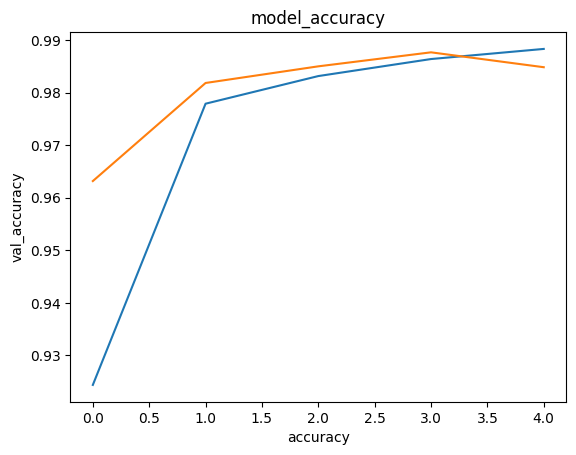

In [ ]:
#model_accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.title('model_accuracy')
plt.show()

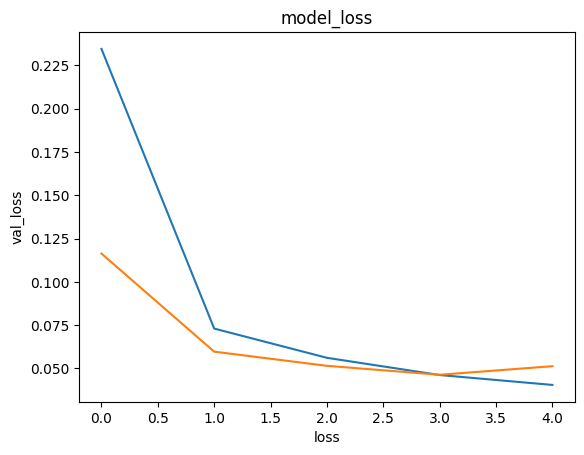

In [ ]:
#model_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.show()

In [ ]:
y_pred=model.predict(test_images)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[-8.955835  , -3.6996272 , -1.1737262 , ..., 11.029063  ,
        -4.9839687 ,  1.3644723 ],
       [-2.7208395 , -3.5731018 ,  6.1343164 , ..., -7.4855747 ,
        -2.4761126 , -7.972593  ],
       [-3.335184  ,  5.9261312 , -3.8634565 , ..., -0.83788556,
        -0.16886085, -2.5578399 ],
       ...,
       [-9.836064  , -5.891939  , -7.5490513 , ..., -2.9733582 ,
        -2.021658  , -0.68430763],
       [-4.26598   , -7.686623  , -8.66009   , ..., -7.9889746 ,
        -1.153184  , -0.58196855],
       [-1.9914502 , -3.1521068 , -3.5191305 , ..., -7.954576  ,
        -3.951307  , -5.119564  ]], dtype=float32)

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
#accuracy_score
accuracy_score(test_labels,y_pred)

0.9869